Задача 3

В качестве распределения, у которого первые 4 момента конечны, а остальные бесконечны, возьмем распределение Парето p(x) = b / x^(b+1) с параметром b=4.

In [8]:
%matplotlib inline

from scipy.stats import pareto, cauchy
import numpy as np
import matplotlib.pyplot as plt

SHAPE = 4
GAMMA = 0.5
VARIANCE = 2.0 / 9

def estimate(samples):
    result = []
    mean = samples[0]
    mean2 = samples[0] ** 2
    for i, sample in enumerate(samples):
        mean = (i * mean + sample) / (i + 1)
        mean2 = (i * mean2 + sample ** 2) / (i + 1)
        result.append(mean2 - mean ** 2)
    return result

def draw_pdf(N, x_min, x_max, y_max, bins, pdf, samples):
    x = np.arange(x_min, x_max, x_max / float(1000)) # 1000 is number of steps to draw pdf
    plt.figure(figsize=(15,10))
    plt.axis([x_min, x_max, 0, y_max])
    plt.plot(x, pdf(x), color='blue', linewidth=3)
    plt.hist(filter(lambda a: a >= x_min and a <= x_max, samples),
             bins=bins, normed=True, color='purple')
    plt.show()

def draw_pareto_variance_error(N, y_max=0.05):
    samples = pareto.rvs(SHAPE, size=N)
    plt.figure(figsize=(15,10))
    plt.axis([0, N, 0, y_max])
    plt.plot(range(N), np.abs(np.array([VARIANCE] * N) - estimate(samples)))
    plt.show()

def draw_cauchy_variance_estimate(N, y_max=10000):
    samples = cauchy.rvs(GAMMA, size=N)
    plt.figure(figsize=(15,10))
    plt.axis([0, N, 0, y_max])
    plt.plot(range(N), estimate(samples), linewidth=3)
    plt.show()

Построим pdf распределения Парето и гистограмму точек сгенерированной выборки (гистограмма лучше подходит для визуализации плотности попадания точек; если отображать просто точки на оси абсцисс, то они сливаются):

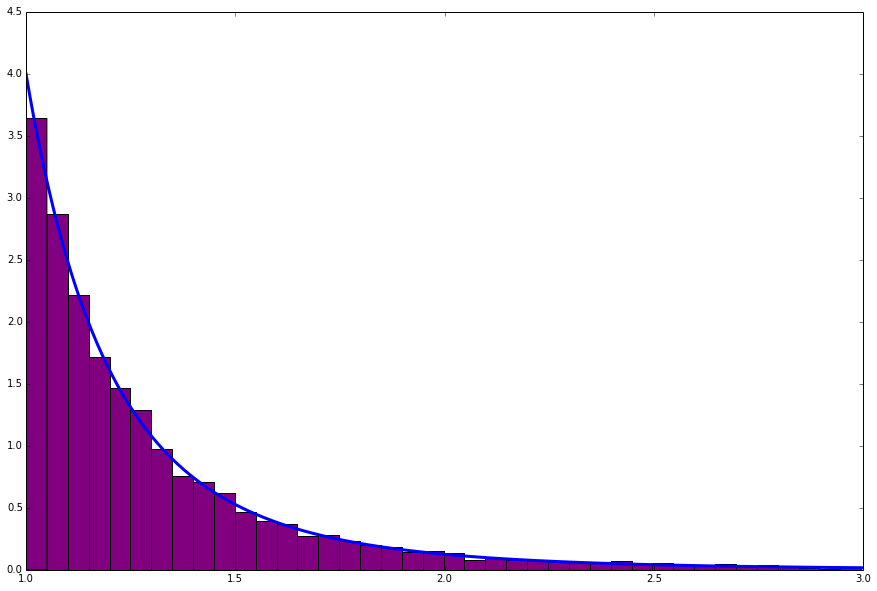

In [9]:
N = 10 ** 4
draw_pdf(N=N, x_min=1, x_max=3, y_max=4.5, bins=40,
         pdf=lambda x: pareto.pdf(x, SHAPE),
         samples=pareto.rvs(SHAPE, size=N))

Теперь построим график зависимости модуля отклонения оценки дисперсии от истинного значения дисперсии в зависимости от n:

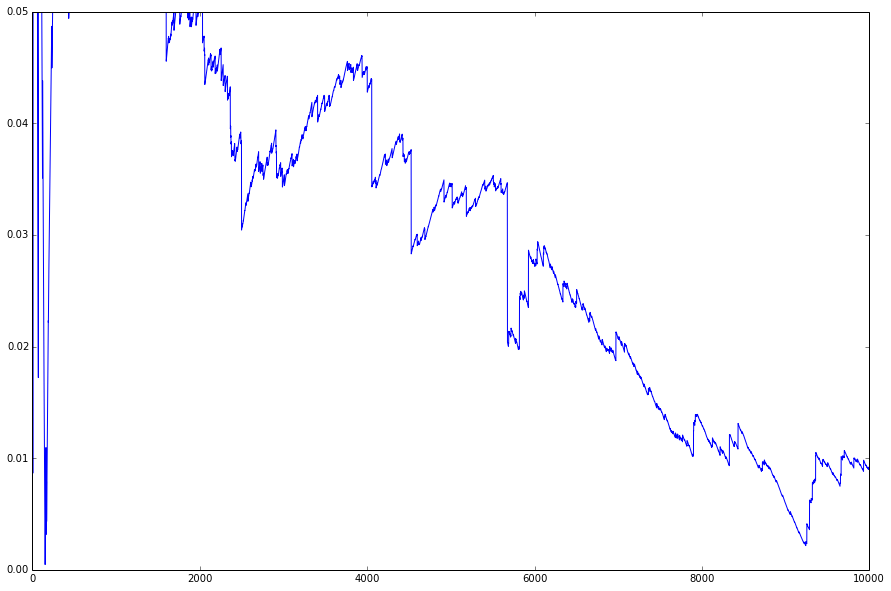

In [11]:
draw_pareto_variance_error(N)

Проделаем то же самое для распределения Коши (однако вместо второго графика построим просто оценку дисперсии):

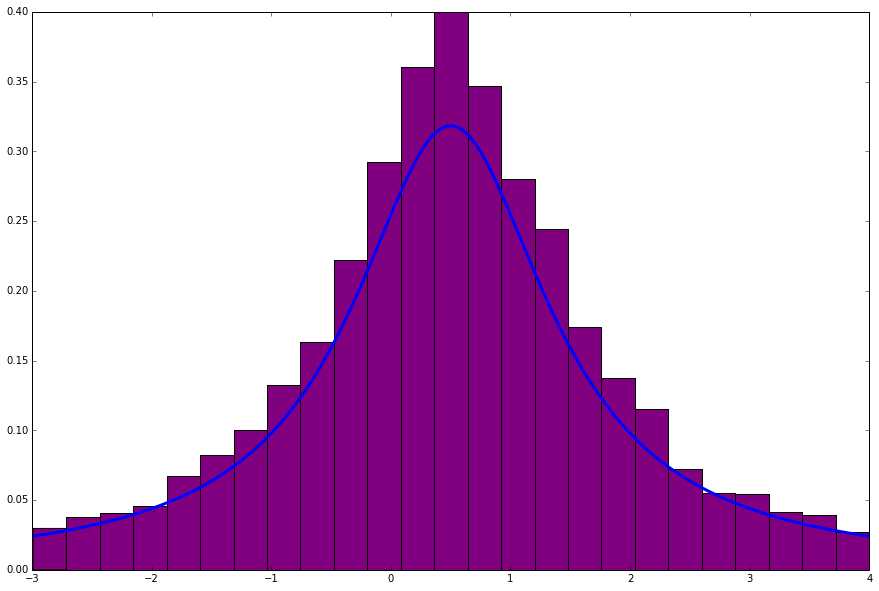

In [12]:
draw_pdf(N=N, x_min=-3, x_max=4, y_max=0.4, bins=25,
         pdf=lambda x: cauchy.pdf(x, GAMMA),
         samples=cauchy.rvs(GAMMA, size=N))

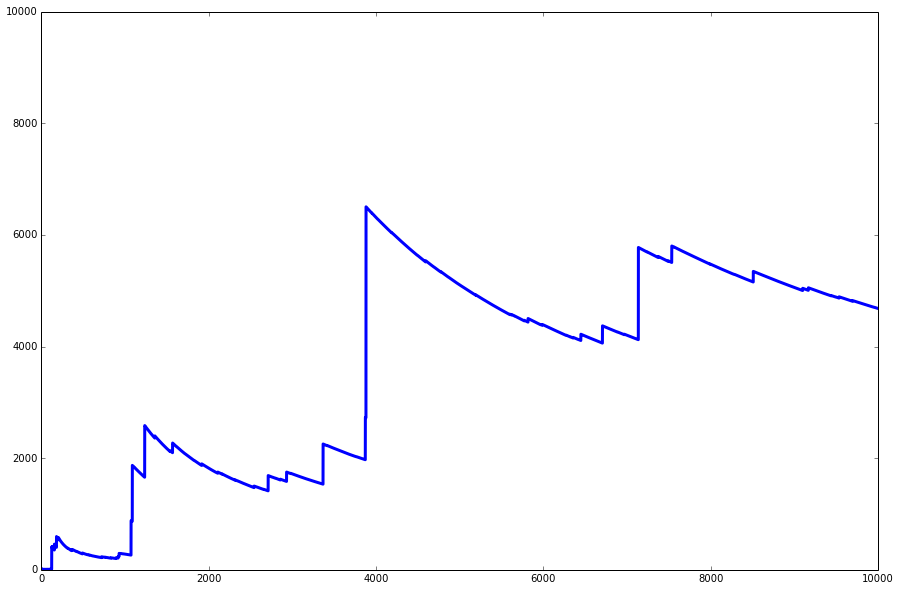

In [25]:
draw_cauchy_variance_estimate(N)

Вид этого графика объясняется свойствами распределения Коши -- его дисперсия неопределена.